In [1]:
# !pip install numpy
# !pip install matplotlib

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
  return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

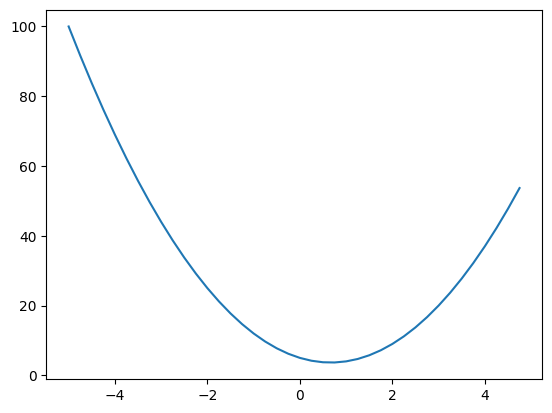

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [6]:
from typing import Callable

def f(x: float) -> float:
    """
    Calcula o valor da função f(x) = 3x^2 - 4x + 5.

    Args:
        x: O valor de entrada da função.

    Returns:
        O resultado de f(x).
    """
    return 3 * x**2 - 4 * x + 5

def aproximacao_derivada(
    func: Callable[[float], float],
    x: float,
    h: float = 1e-7  # Valor padrão para h, pode ser ajustado
) -> float:
    """
    Calcula a aproximação da derivada de uma função em um ponto x
    usando a definição de diferença finita progressiva.

    Args:
        func: A função da qual calcular a derivada.
              Deve aceitar um float e retornar um float.
        x: O ponto no qual a derivada será calculada.
        h: Um pequeno incremento (passo) usado para calcular a derivada.
           Conhecido como "delta" ou "epsilon" em alguns contextos.

    Returns:
        A aproximação da derivada de func(x).
    """
    return (func(x + h) - func(x)) / h

# h: um valor pequeno para o incremento
# Escolher um h muito pequeno pode levar a erros de precisão numérica,
# enquanto um h muito grande pode levar a uma má aproximação da derivada.
# O valor 1e-7 é frequentemente um bom compromisso.
incremento_h = 0.0001
ponto_x = 2/3

print(f"Valor da função em x={ponto_x:.4f}: f(x) = {f(ponto_x):.4f}")

derivada_em_x = aproximacao_derivada(func=f, x=ponto_x, h=incremento_h)
print(f"A derivada aproximada de f(x) em x={ponto_x:.4f} é: {derivada_em_x:.4f}")

# Para f(x) = 3x^2 - 4x + 5, a derivada analítica é f'(x) = 6x - 4.
# No ponto x = 2/3, f'(2/3) = 6*(2/3) - 4 = 4 - 4 = 0.
# A aproximação numérica deve ser próxima de 0.

Valor da função em x=0.6667: f(x) = 3.6667
A derivada aproximada de f(x) em x=0.6667 é: 0.0003


In [7]:
# les get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


Demonstra como calcular numericamente a derivada parcial da expressão d=a⋅b+c em relação à variável c.

- ∂d / ∂a = b
- ∂b / ∂d = a
- ∂c / ∂d = 1

In [8]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c  # Calcula d com o valor original de c
c += h        # "Empurra" c por uma pequena quantidade h
d2 = a*b + c  # Calcula d novamente, agora com o novo valor de c

delta_d = d2 - d1 # mudança na saída d

print('d1', d1)
print('d2', d2)
print('slope', (delta_d)/h) # Valor da inclinação da função d em relação a variavel c. 

# Ele nos diz que, para cada unidade que c aumenta (mantendo a e b constantes), d também aumenta em 1 unidade.]


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [9]:
import math  # Para funções matemáticas como exp, log, tanh

class Value:
    """
    Representa um valor escalar que participa de um grafo computacional
    para permitir a diferenciação automática (autograd).
    """
    
    def __init__(self, data: float, _children: tuple = (), _op: str = '', label: str = ''):
        """
        Inicializa um objeto Value.

        Args:
            data (float): O valor numérico escalar.
            _children (tuple, optional): Uma tupla de objetos Value que são os "filhos"
                                         (operandos) que geraram este Value. Default é ().
            _op (str, optional): A operação que gerou este Value (ex: '+', '*'). Default é ''.
            label (str, optional): Um rótulo opcional para este Value, útil para depuração. Default é ''.
        """
        self.data = data
        self.grad = 0.0  # Gradiente da saída final da expressão em relação a este Value.]

        # Atributos internos para o backpropagation e construção do grafo:
        self._backward = lambda: None  # Função que propaga o gradiente para os filhos.]
                                      # Será sobrescrita por cada operação.
        self._prev = set(_children)   # Conjunto dos nós filhos (operandos).]
        self._op = _op                # Operação que criou este nó.]
        self.label = label            # Rótulo para identificação.]

    def __repr__(self) -> str:
        """
        Representação em string do objeto Value, mostrando data, rótulo e gradiente.
        """
        return f"Value(data={self.data:.4f}, label='{self.label}', grad={self.grad:.4f})"

    def _ensure_value(self, other) -> 'Value':
        """
        Garante que o 'other' operando seja também um objeto Value.
        Se for um número (int ou float), ele é convertido para Value.
        """
        return other if isinstance(other, Value) else Value(other)

    # --- Operações Aritméticas e Métodos Especiais ---

    def __add__(self, other) -> 'Value':
        """
        Implementa a adição: self + other.
        """
        other = self._ensure_value(other) # Garante que 'other' seja um Value]
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            # Derivada da soma: d(out)/d(self) = 1, d(out)/d(other) = 1
            # Aplicando a regra da cadeia: dL/d(self) = dL/d(out) * d(out)/d(self)
            self.grad += 1.0 * out.grad  #]
            other.grad += 1.0 * out.grad #]
        out._backward = _backward
        
        return out

    def __mul__(self, other) -> 'Value':
        """
        Implementa a multiplicação: self * other.
        """
        other = self._ensure_value(other) # Garante que 'other' seja um Value]
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            # Derivada do produto: d(out)/d(self) = other.data, d(out)/d(other) = self.data
            self.grad += other.data * out.grad  #]
            other.grad += self.data * out.grad #]
        out._backward = _backward
          
        return out

    def __pow__(self, other: float) -> 'Value':
        """
        Implementa a potenciação: self ** other (onde 'other' é um escalar int ou float).
        """
        assert isinstance(other, (int, float)), "Apenas potências escalares (int/float) são suportadas por enquanto."
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            # Derivada de x^n = n * x^(n-1)
            self.grad += (other * (self.data ** (other - 1))) * out.grad #]
        out._backward = _backward

        return out
        
    def __neg__(self) -> 'Value': # -self
        """
        Implementa a negação: -self. É o mesmo que self * -1.
        """
        return self * -1 #]

    def __sub__(self, other) -> 'Value': # self - other
        """
        Implementa a subtração: self - other. É o mesmo que self + (-other).
        """
        return self + (-other) #]

    def __truediv__(self, other) -> 'Value': # self / other
        """
        Implementa a divisão: self / other. É o mesmo que self * (other ** -1).
        """
        return self * (self._ensure_value(other) ** -1) #]

    # Métodos refletidos para operações onde Value não é o primeiro operando (ex: 2 + a)
    def __radd__(self, other) -> 'Value': # other + self
        return self + other #]

    def __rsub__(self, other) -> 'Value': # other - self
        return self._ensure_value(other) + (-self)

    def __rmul__(self, other) -> 'Value': # other * self
        return self * other #]

    def __rtruediv__(self, other) -> 'Value': # other / self
        return self._ensure_value(other) * (self ** -1)

    # --- Funções de Ativação e Outras Funções Matemáticas ---

    def tanh(self) -> 'Value':
        """
        Implementa a função de ativação tangente hiperbólica.
        tanh(x) = (e^(2x) - 1) / (e^(2x) + 1)
        """
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1) #]
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            # Derivada de tanh(x) = 1 - tanh(x)^2 = 1 - t^2
            self.grad += (1 - t**2) * out.grad #]
        out._backward = _backward
        
        return out

    def exp(self) -> 'Value':
        """
        Implementa a função exponencial: e ** self.data
        """
        x = self.data
        out = Value(math.exp(x), (self,), 'exp') #]
        
        def _backward():
            # Derivada de e^x = e^x
            self.grad += out.data * out.grad # out.data é e^x]
        out._backward = _backward
        return out

    def log(self, base: float = math.e) -> 'Value':
        """
        Implementa a função logarítmica (log natural por padrão).
        """
        x = self.data
        if x <= 0:
            raise ValueError("Logaritmo indefinido ou complexo para data <= 0.")
        
        # Logaritmo na base desejada
        log_val = math.log(x, base)
        out = Value(log_val, (self,), f'log_base{base:.2f}')
        
        def _backward():
            # Derivada de log_b(x) = 1 / (x * ln(b))
            # Para log natural (ln(x), base=e), a derivada é 1/x.
            self.grad += (1 / (x * math.log(base))) * out.grad
        out._backward = _backward
        return out

    # --- Backpropagation ---
    
    def backward(self):
        """
        Realiza o backpropagation a partir deste Value (geralmente o nó de perda).
        Calcula os gradientes para todos os Values no grafo que levaram a este.
        """
        
        # Passo 1: Montando a "Linha de Montagem" na Ordem Certa (Ordenação Topológica)
        # Imagine que para construir sua torre final (self), você usou vários blocos em sequência.
        # Para saber a influência de cada um, precisamos revisitá-los na ordem em que foram usados,
        # mas de trás para frente.
        # 'topo' será uma lista de todos os blocos (Values) que participaram da construção,
        # desde os blocos iniciais até o bloco final (self).
        
        topo = []      # Lista para guardar os blocos na ordem correta.
        visited = set() # Para não contar o mesmo bloco duas vezes se ele foi usado em vários lugares.
        
        def build_topo(v_node): # v_node é o bloco atual que estamos olhando
            if v_node not in visited:
                # print("Olando: ", v_node)
                visited.add(v_node)
                # '_prev' são os blocos que foram usados DIRETAMENTE para fazer o 'v_node'.
                # Por exemplo, se v_node = bloco_A + bloco_B, então bloco_A e bloco_B estão em v_node._prev.
                for child_node in v_node._prev: 
                    # print(f"child_node: {child_node} de v_node:{v_node}")
                    build_topo(child_node) # Primeiro, olhamos os blocos que vieram ANTES.
                
                # print(f"append: {v_node}")
                topo.append(v_node)        # Só depois de processar os blocos anteriores, adicionamos o atual.
                
        build_topo(self) # Começamos a organizar a "linha de montagem" a partir da torre final (self).
        # Ao final, 'topo' terá algo como [bloco_inicial1, bloco_inicial2, ..., bloco_intermediario, ..., self (torre_final)]
        #] (Karpathy constrói essa lógica recursiva)
        
        for idx, value in enumerate(topo):
            print(f"idx:{idx}, value:{value}")
        # Passo 2: A "Responsabilidade" Inicial
        # A torre final (self) é 100% responsável por si mesma. Se a altura da torre final muda em X,
        # é porque a altura da torre final mudou em X.
        # Em termos de gradientes, o gradiente da perda em relação à própria perda é 1.
        self.grad = 1.0 # Este é o ponto de partida da "distribuição de responsabilidade".]
        
        # Passo 3: Distribuindo a "Responsabilidade" de Trás Para Frente
        # Agora, vamos percorrer nossa "linha de montagem" ao contrário:
        # da torre final (self) até os blocos iniciais.
        for node in reversed(topo): # 'reversed(topo)' inverte a lista. Ex: [self, ..., bloco_inicial1]]
            # Para cada bloco (node) na nossa linha de montagem invertida...
            node._backward() # Chamamos a "mágica" daquele bloco específico.]

In [ ]:
# 1. Criando Values e operações básicas
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

# Adição
d = a + b; d.label = 'd'  # d.data = -1.0
print(f"$ {a} + {b} = {d}")

# Multiplicação
e = d * c; e.label = 'e'  # e.data = -10.0
print(f"$ {d} * {c} = {e}")

# Operação com escalar (graças ao _ensure_value e __rmul__)
f = 2 * e; f.label = 'f' # f.data = -20.0
print(f"$ 2 * {e} = {f}")

# Negação
g = -f; g.label = 'g' # g.data = 20.0
print(f"$ - {f} = {g}")

# Potenciação
h_val = Value(3.0, label='h_val')
i = h_val**3; i.label = 'i' # i.data = 27.0
print(f"$ {h_val} ** 3 = {i}")

# Subtração
j = i - Value(7.0, label='sete'); j.label = 'j' # j.data = 20.0
print(f"$ {i} - Value(7.0) = {j}")

# Divisão
k_val = Value(4.0, label='k_val')
m = j / k_val; m.label = 'm' # m.data = 5.0
print(f"$ {j} / {k_val} = {m}")

# Tanh
n = m.tanh(); n.label = 'n' # n.data = tanh(5.0) ~ 0.9999
print(f"$ tanh({m}) = {n}")

# Exp e Log
p_val = Value(1.0, label='p_val')
q = p_val.exp(); q.label = 'q' # q.data = e^1 ~ 2.718
r = q.log(); r.label = 'r'     # r.data = ln(e^1) = 1.0
print(f"$ exp({p_val}) = {q}")
print(f"$ log({q}) = {r}")

print("\n--- Exemplo de Backpropagation ---")
# Expressão do vídeo: L = d * f_video (usando nomes diferentes para evitar conflito com 'f' acima)
# Onde d = e_video + c_video
# E   e_video = a_video * b_video

a_video = Value(2.0, label='a_video')
b_video = Value(-3.0, label='b_video')

c_video = Value(10.0, label='c_video')
f_video_val = Value(-2.0, label='f_video_val') # Renomeado para evitar conflito com a variável f usada antes

e_video = a_video * b_video
e_video.label = 'e_video'

d_video = e_video + c_video
d_video.label = 'd_video'

L = d_video * f_video_val
L.label = 'L'

print(f"Expressão: L = ({a_video.label}*{b_video.label} + {c_video.label}) * {f_video_val.label}")
print(f"Valor final de L: {L}")

# Realizando o backpropagation
L.backward()

print("\nGradientes calculados:")
print(L)
print(d_video)
print(f_video_val)
print(e_video)
print(c_video)
print(a_video)
print(b_video)

# Verificando os gradientes (como no vídeo)
# dL/dL = 1.0
# L = d_video * f_video_val => dL/d(d_video) = f_video_val.data = -2.0
#                        => dL/d(f_video_val) = d_video.data = 4.0
# d_video = e_video + c_video => d(d_video)/d(e_video) = 1.0
#                           => d(d_video)/d(c_video) = 1.0
# Por regra da cadeia: dL/d(e_video) = dL/d(d_video) * d(d_video)/d(e_video) = -2.0 * 1.0 = -2.0
#                    dL/d(c_video) = dL/d(d_video) * d(d_video)/d(c_video) = -2.0 * 1.0 = -2.0
# e_video = a_video * b_video => d(e_video)/d(a_video) = b_video.data = -3.0
#                           => d(e_video)/d(b_video) = a_video.data = 2.0
# Por regra da cadeia: dL/d(a_video) = dL/d(e_video) * d(e_video)/d(a_video) = -2.0 * -3.0 = 6.0
#                    dL/d(b_video) = dL/d(e_video) * d(e_video)/d(b_video) = -2.0 * 2.0 = -4.0

# assert abs(L.grad - 1.0) < 1e-5
# assert abs(d_video.grad - (-2.0)) < 1e-5
# assert abs(f_video_val.grad - 4.0) < 1e-5
# assert abs(e_video.grad - (-2.0)) < 1e-5
# assert abs(c_video.grad - (-2.0)) < 1e-5
# assert abs(a_video.grad - 6.0) < 1e-5
# assert abs(b_video.grad - (-4.0)) < 1e-5
# print("\nTodos os gradientes verificados com sucesso!")

$ Value(data=2.0000, label='a', grad=0.0000) + Value(data=-3.0000, label='b', grad=0.0000) = Value(data=-1.0000, label='d', grad=0.0000)
$ Value(data=-1.0000, label='d', grad=0.0000) * Value(data=10.0000, label='c', grad=0.0000) = Value(data=-10.0000, label='e', grad=0.0000)
$ 2 * Value(data=-10.0000, label='e', grad=0.0000) = Value(data=-20.0000, label='f', grad=0.0000)
$ - Value(data=-20.0000, label='f', grad=0.0000) = Value(data=20.0000, label='g', grad=0.0000)
$ Value(data=3.0000, label='h_val', grad=0.0000) ** 3 = Value(data=27.0000, label='i', grad=0.0000)
$ Value(data=27.0000, label='i', grad=0.0000) - Value(7.0) = Value(data=20.0000, label='j', grad=0.0000)
$ Value(data=20.0000, label='j', grad=0.0000) / Value(data=4.0000, label='k_val', grad=0.0000) = Value(data=5.0000, label='m', grad=0.0000)
$ tanh(Value(data=5.0000, label='m', grad=0.0000)) = Value(data=0.9999, label='n', grad=0.0000)
$ exp(Value(data=1.0000, label='p_val', grad=0.0000)) = Value(data=2.7183, label='q', grad

In [ ]:
# !pip install yfinance
import yfinance as yf

yf.download("IRDM11.SA", )

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,IRDM11.SA,IRDM11.SA,IRDM11.SA,IRDM11.SA,IRDM11.SA
Date,,,,,
2020-06-04,77.042221,77.241984,76.849116,77.082177,15575
2020-06-05,75.916862,77.741373,75.244326,77.241960,29282
2020-06-08,76.809158,77.088828,74.944697,75.876928,54123
2020-06-09,76.675964,77.228644,76.449568,76.909025,30040
2020-06-10,76.376350,76.496207,74.878123,76.496207,29834
...,...,...,...,...,...
2025-05-26,69.330002,69.500000,69.000000,69.480003,33749
2025-05-27,68.900002,69.330002,68.830002,69.150002,31922


In [ ]:
a, b

(Value(data=1.0, label=a), Value(data=2.0, label=b))

In [15]:
import tensorflow as tf
import time

# --- 1. Verificar se a GPU está disponível ---
print("GPU(s) disponível(eis):", tf.config.list_physical_devices('GPU'))
if tf.config.list_physical_devices('GPU'):
    print("GPU detectada e pronta para uso!")
    strategy = tf.distribute.MirroredStrategy() # Para usar múltiplas GPUs, se houver
else:
    print("Nenhuma GPU detectada. Usando CPU.")
    strategy = tf.distribute.OneDeviceStrategy("CPU")


# --- 2. Preparar um conjunto de dados (MNIST) ---
# MNIST é um conjunto de dados de dígitos escritos à mão, ideal para começar.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# --- 3. Definir e treinar um modelo de Rede Neural Convolucional (CNN) ---
with strategy.scope(): # O treinamento acontece dentro do escopo da estratégia (GPU ou CPU)
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') # 10 classes para dígitos (0-9)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nIniciando o treinamento do modelo...")
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
end_time = time.time()
print(f"\nTreinamento concluído em {end_time - start_time:.2f} segundos.")

# --- 4. Avaliar o modelo ---
print("\nAvaliação do modelo no conjunto de teste:")
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss no teste: {loss:.4f}")
print(f"Acurácia no teste: {accuracy:.4f}")

2025-05-30 14:35:32.522327: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-30 14:35:32.828517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748626532.950548  268000 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748626533.019024  268000 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748626533.385529  268000 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

KeyboardInterrupt: 

In [13]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


In [22]:
# a = Value(2.0, label='a')
# b = Value(-3.0, label='b')
# c = Value(10.0, label='c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'
# f = Value(-2.0, label='f')
# L = d * f; L.label = 'L'

# draw_dot(L)

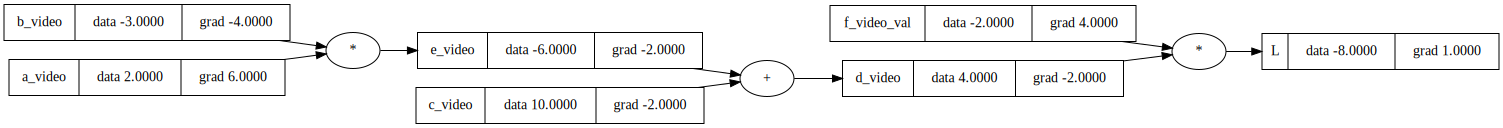

In [26]:
draw_dot(L)


In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)


-7.286496


In [ ]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
lol()

-3.9999999999995595


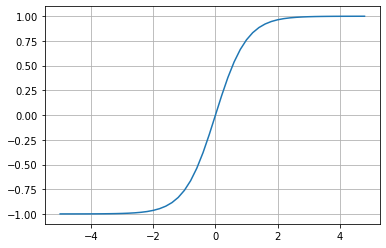

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

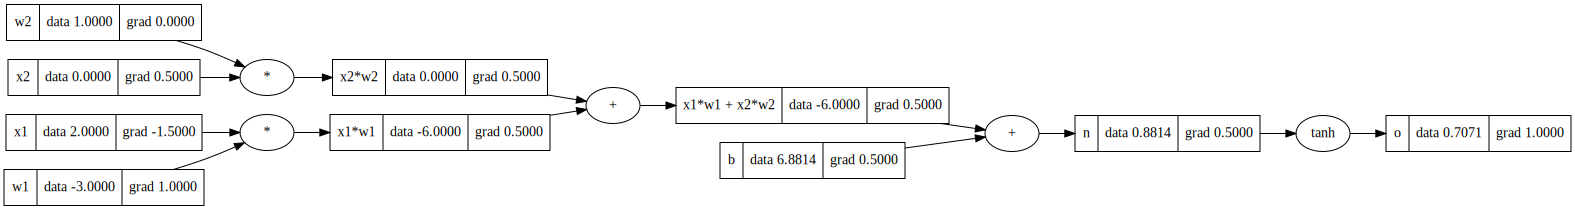

In [ ]:
draw_dot(o)

In [ ]:
o.backward()

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
o.grad = 1.0

In [ ]:
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0

In [ ]:
1 - o.data**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

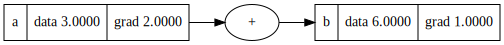

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

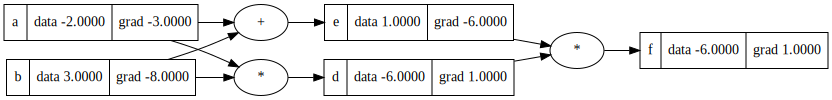

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)